In [6]:
import pandas as  pd
import plotly.express as px
import seaborn as sns


In [7]:
train_df = pd.read_csv('../data/vinbigdata_512x512/train.csv')

In [8]:
train_df.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072


In [19]:
train_df.class_name.unique()

array(['No finding', 'Cardiomegaly', 'Aortic enlargement',
       'Pleural thickening', 'ILD', 'Nodule/Mass', 'Pulmonary fibrosis',
       'Lung Opacity', 'Atelectasis', 'Other lesion', 'Infiltration',
       'Pleural effusion', 'Calcification', 'Consolidation',
       'Pneumothorax'], dtype=object)

In [26]:
train_df.class_id.unique()

array([14,  3,  0, 11,  5,  8, 13,  7,  1,  9,  6, 10,  2,  4, 12],
      dtype=int64)

In [13]:
train_df[train_df['image_id'] == '50a418190bc3fb1ef1633bf9678929b3']

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
45863,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R15,NaN,NaN,NaN,NaN,2332,2580
57424,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R16,NaN,NaN,NaN,NaN,2332,2580


In [14]:
train_df.rad_id.unique()

array(['R11', 'R7', 'R10', 'R9', 'R17', 'R3', 'R8', 'R6', 'R5', 'R4',
       'R2', 'R16', 'R1', 'R15', 'R13', 'R12', 'R14'], dtype=object)

In [9]:
print('train data total length : ', len(train_df))
print('train data unique length : ', len(train_df.image_id.unique()))
print('The average number of disease per patient :', len(train_df)/len(train_df.image_id.unique()))
print('The average number of disease per patient (without healty people):', len(train_df[train_df.class_id!=14])/len(train_df[train_df.class_id!=14].image_id.unique()))


train data total length :  67914
train data unique length :  15000
The average number of disease per patient : 4.5276
The average number of disease per patient (without healty people): 8.214838416021848


In [11]:
fig = px.histogram(train_df.image_id.value_counts(),
                   title="<b>Distribution of Image Number per Patient",
                   log_y = True
                   )
fig.update_layout(showlegend=False,
                  xaxis_title="<b>Number of Images</b>",
                  yaxis_title="<b>Count of Unique Patient",)
fig.show()

fig = px.histogram(train_df.groupby('image_id')["class_name"].unique().apply(lambda x: len(x)),  
                   title="<b>Distribution of Unique Abnormalities per Patient",
                   log_y = True
                   )
fig.update_layout(showlegend=False,
                  xaxis_title="<b>Number of Unique Abnormalities</b>",
                  yaxis_title="<b>Count of Unique Patients</b>")
fig.show()

In [12]:
fig = px.bar(train_df.class_name.value_counts().sort_index(), 
             color=train_df.class_name.value_counts().sort_index().index,
             title="<b>Label Distribution</b>")
fig.update_layout(legend_title=None,
                  xaxis_title="",
                  yaxis_title="")
fig.show()

fig = px.bar(train_df[train_df.class_id!=14].class_name.value_counts().sort_index(), 
             color=train_df[train_df.class_id!=14].class_name.value_counts().sort_index().index,
             title="<b>Label Distribution except No Finding</b>")
fig.update_layout(legend_title=None,
                  xaxis_title="",
                  yaxis_title="")
fig.show()

In [15]:
bbox_df = train_df[train_df.class_id!=14].reset_index(drop=True)
bbox_df['frac_x_min'] = bbox_df.apply(lambda x: x.x_min / x.width, axis =1)
bbox_df['frac_y_min'] = bbox_df.apply(lambda x: x.y_min / x.height, axis =1)
bbox_df['frac_x_max'] = bbox_df.apply(lambda x: x.x_max / x.width, axis =1)
bbox_df['frac_y_max'] = bbox_df.apply(lambda x: x.y_max / x.height, axis =1)
bbox_df.head()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,frac_x_min,frac_y_min,frac_x_max,frac_y_max
0,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336,0.332212,0.588613,0.794712,0.783818
1,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880,0.548611,0.257986,0.699219,0.353819
2,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0,2540,3072,0.246850,0.116211,0.372835,0.140951
3,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0,2285,2555,0.589497,0.095890,0.957549,0.848924
4,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0,2568,3353,0.216900,0.701461,0.262850,0.740829


100%|██████████| 36096/36096 [00:20<00:00, 1789.65it/s]


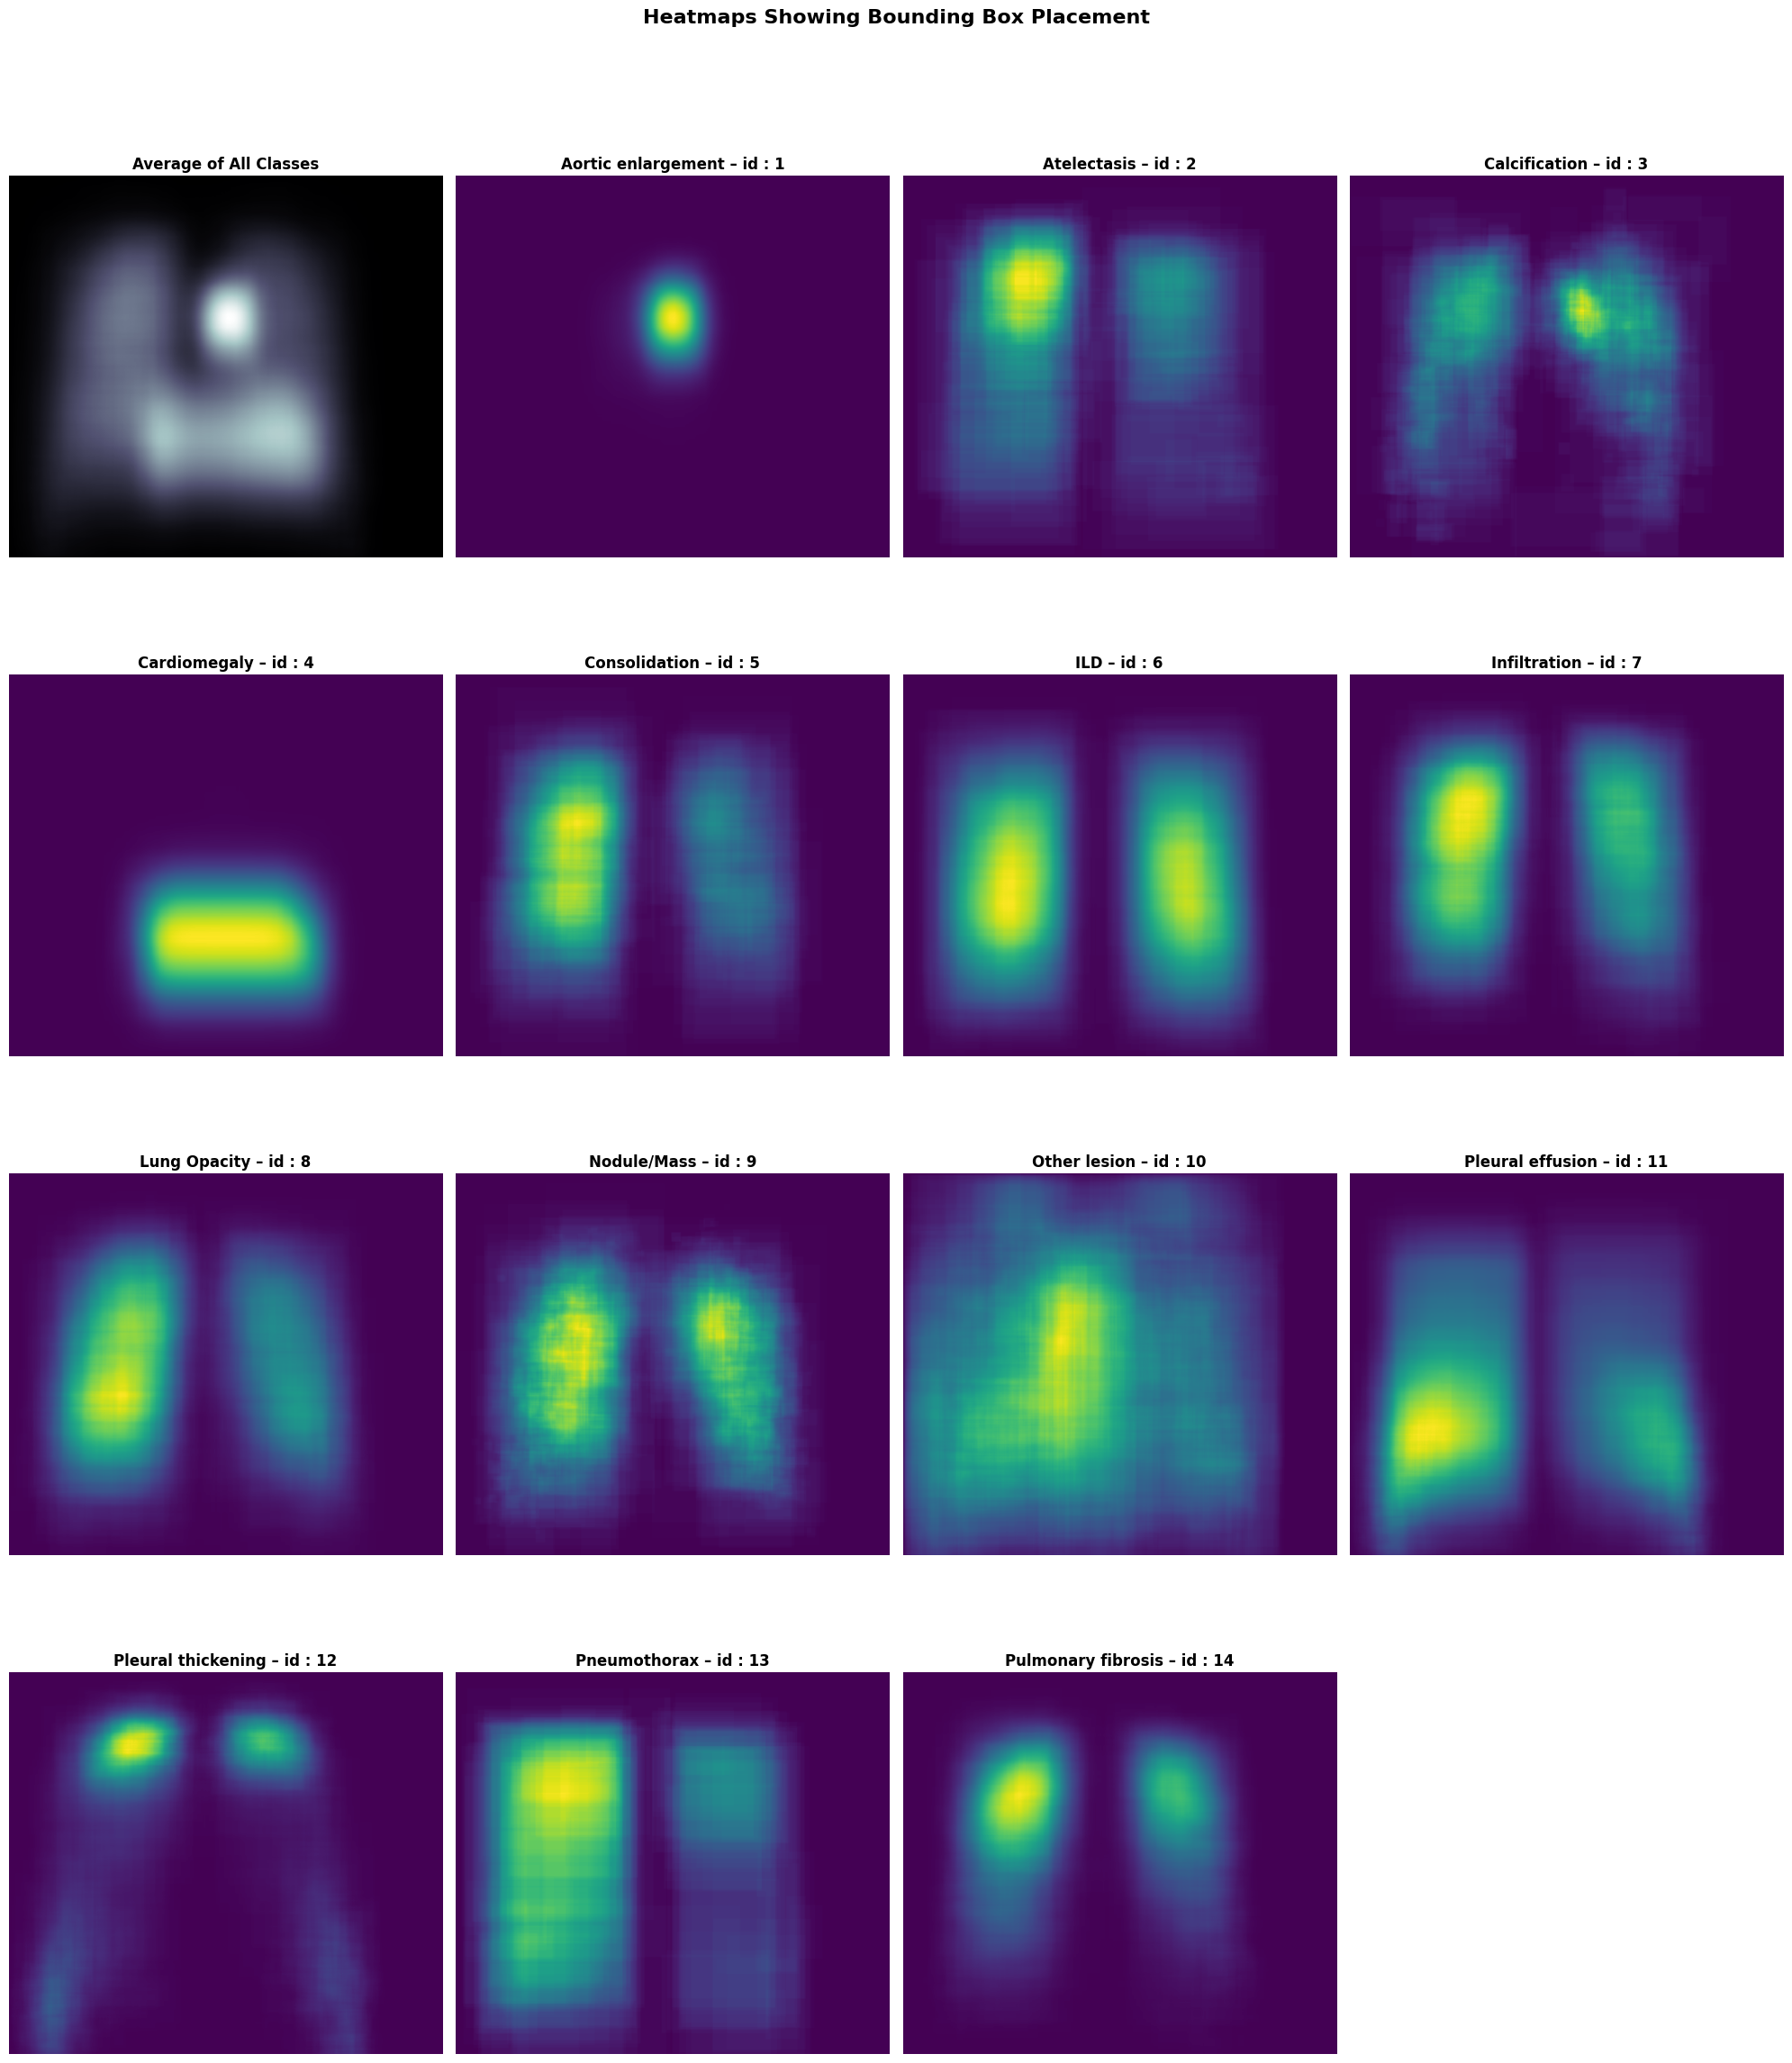

In [17]:
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np

avg_width  = int(np.mean(bbox_df.width))
avg_height = int(np.mean(bbox_df.height))

heatmap_size = (avg_width, avg_height, 14)
heatmap = np.zeros((heatmap_size), dtype=np.int16)

bbox_np = bbox_df[["class_id", "frac_x_min", "frac_x_max", "frac_y_min", "frac_y_max"]].to_numpy()
bbox_np[:, 1:3] *= avg_width; bbox_np[:, 3:5] *= avg_height
bbox_np = np.floor(bbox_np).astype(np.int16)

label_dic = {i:train_df[train_df["class_id"]==i].iloc[0]["class_name"] for i in range(15)}

for row in tqdm(bbox_np, total=bbox_np.shape[0]):
    heatmap[row[3]:row[4]+1, row[1]:row[2]+1, row[0]] += 1
    
fig = plt.figure(figsize=(20,25))
plt.suptitle("Heatmaps Showing Bounding Box Placement\n ", fontweight="bold", fontsize=16)
for i in range(15):
    plt.subplot(4, 4, i+1)
    if i==0:
        plt.imshow(heatmap.mean(axis=-1), cmap="bone")
        plt.title(f"Average of All Classes", fontweight="bold")
    else:
        plt.imshow(heatmap[:, :, i-1])
        plt.title(f"{label_dic[i-1]} – id : {i}", fontweight="bold")
        
    plt.axis(False)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
